In [1]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [7,7]
import time
from IPython.display import clear_output, display, HTML
from ipywidgets import widgets, HBox, Label
import random
import traitlets

import pandas as pd

In [2]:
df_table = pd.DataFrame(columns = ['N_shapes', 'N_guess','Correct', 'Shape', 'Color'])

In [3]:
def hide_code():
    return HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $("div.input").hide();
     } else {
     $("div.input").show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <a href="javascript:code_toggle()">Toggle Code</a>.''')

In [4]:
hide_code()

In [5]:
def transform3(max_val):
    return list(range(1, max_val))

In [6]:
def transform4(min_val):
    return list(range(min_val, 16))

In [7]:
max_shapes_dropdown = widgets.Dropdown(options=list(range(1,16)),value=10)
min_shapes_dropdown = widgets.Dropdown(options=list(range(1,16)),value=1)
c3 = traitlets.directional_link((max_shapes_dropdown, 'value'), (min_shapes_dropdown, 'options'), transform3)
c4 = traitlets.directional_link((min_shapes_dropdown, 'value'), (max_shapes_dropdown, 'options'), transform4)
n_seconds_dropdown = widgets.Dropdown(options=list(range(1,3)),value=1)
display(HBox([Label('Max Number of Shapes in Game:'),max_shapes_dropdown]))
display(HBox([Label('Min Number of Shapes in Game:'),min_shapes_dropdown]))
display(HBox([Label('Number of Seconds:'),n_seconds_dropdown]))

In [8]:
def game2():
    max_n_shapes = max_shapes_dropdown.value
    min_n_shapes = min_shapes_dropdown.value
    n_seconds = n_seconds_dropdown.value
    list_of_shapes = ['o','^','<','>','s']
    list_of_colors = ['b', 'g', 'r']
    set_of_points = [(x,y) for x in range(2,8) for y in range(2,8)]
    
    n_shapes = random.randint(min_n_shapes,max_n_shapes)
    
    shape = random.choice(list_of_shapes)
    color = random.choice(list_of_colors)
    
    indices = random.sample(range(len(set_of_points)), n_shapes)
    points = [set_of_points[i] for i in indices]
    
    x_vals = [point[0] for point in points]
    y_vals = [point[1] for point in points]
    
    return x_vals, y_vals, color, shape

In [9]:
def on_button_clicked(b):    
    global x_vals, y_vals, color, shape
    x_vals, y_vals, color, shape= game2()
    
    
    plt.xlim([0,10])
    plt.ylim([0,10])    
    plt.scatter(x_vals, y_vals, s=500, facecolors=color, marker = shape)        
    plt.show()
    
    time.sleep(1)
    
    clear_output()

In [10]:
button = widgets.Button(description = 'Play', height = '100%', width = '100%')
display(button)
button.on_click(on_button_clicked)

In [11]:
def transform(max_val):
    return list(range(min_shapes_dropdown.value,max_val+1))

In [12]:
def transform2(min_val):
    return list(range(min_val,max_shapes_dropdown.value+1))

In [13]:
n_shapes_dropdown = widgets.Dropdown(options=list(range(min_shapes_dropdown.value,
                                                        max_shapes_dropdown.value+1)),value=1, continuous_update=True)
c = traitlets.directional_link((max_shapes_dropdown, 'value'), (n_shapes_dropdown, 'options'), transform)
c2 = traitlets.directional_link((min_shapes_dropdown, 'value'), (n_shapes_dropdown, 'options'), transform2)

In [14]:
display(HBox([Label('How many shapes did you see?:'),n_shapes_dropdown]))

In [15]:
def on_button_clicked2(b):
    clear_output()
    n_shapes_user = n_shapes_dropdown.value
    if int(n_shapes_user)==len(x_vals):
        print('Correct!')

    else:
        print('False! Your answer was '+str(n_shapes_user)+'. The correct number was '+str(len(x_vals)))
        
    plt.scatter(x_vals, y_vals, s=500, facecolors=color, marker = shape)  
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.show()
    
    global df_table
    series = pd.Series([len(x_vals), n_shapes_user, (len(x_vals)==n_shapes_user)*1, shape, color], index = df_table.columns)
    df_table = df_table.append(series, ignore_index = True)
    print('Cumulative Score: '+str(int(df_table.Correct.sum()))+'/'+str(len(df_table)))

Correct!


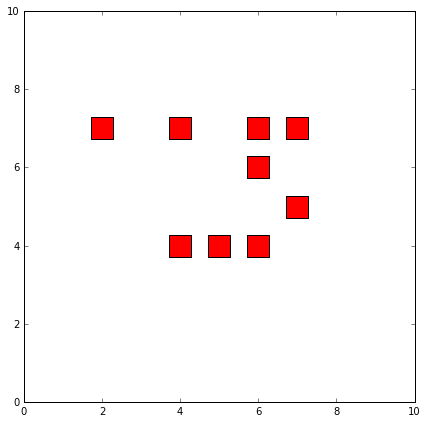

Cumulative Score: 25/28


In [16]:
button2 = widgets.Button(description = 'Check')
display(button2)
button2.on_click(on_button_clicked2)

In [17]:
df_table

,N_shapes,N_guess,Correct,Shape,Color
